In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, recall_score, precision_score, roc_curve, roc_auc_score

### Importing datasets

In [113]:
df_train = pd.read_csv('C:/Users/jites/Downloads/admission_chances_train - Sheet1.csv')
df_test = pd.read_csv('C:/Users/jites/Downloads/admission_chances_test - Sheet1.csv')

In [114]:
df_train.head()

,Score 1,Score 2,Student admitted or not
0,30.05882,49.59297,0
1,50.45816,75.80986,1
2,32.57720,95.59855,0
3,58.84096,75.85845,1
4,94.09433,77.15911,1


### Check for missing values

In [115]:
df_train.isnull().sum()

Score 1                    0
Score 2                    0
Student admitted or not    0
dtype: int64

 - The above analysis shows there are <b>no missing values</b> in the given dataset

### Describing variables

In [116]:
df_train.describe()

,Score 1,Score 2,Student admitted or not
count,75.000000,75.000000,75.000000
mean,64.444500,66.605824,0.586667
std,20.071168,18.715895,0.495748
min,30.058820,30.603260,0.000000
25%,50.372330,49.224390,0.000000
50%,64.039320,68.861570,1.000000
75%,80.155790,78.242625,1.000000
max,99.827860,98.869440,1.000000


### Describing feature columns

In [117]:
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, 2]
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, 2]

In [118]:
X_train

,Score 1,Score 2
0,30.05882,49.59297
1,50.45816,75.80986
2,32.57720,95.59855
3,58.84096,75.85845
4,94.09433,77.15911
...,...,...
70,89.67678,65.79937
71,66.74672,60.99139
72,40.23689,71.16775
73,51.54772,46.85629


In [119]:
# Renaming last column
df = df_train.rename(columns={"Student admitted or not":"prediction"})

In [120]:
df.head(5)

,Score 1,Score 2,prediction
0,30.05882,49.59297,0
1,50.45816,75.80986,1
2,32.57720,95.59855,0
3,58.84096,75.85845,1
4,94.09433,77.15911,1


# Data exploration

## Plotting class distributions for training and test sets

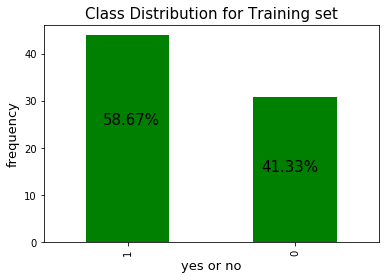

In [121]:
plt.title("Class Distribution for Training set", fontsize=15)
plt.xlabel("yes or no", fontsize=13)
plt.ylabel("frequency", fontsize=13)
zeroes = str(round(y_train.value_counts()[0]/len(y_train),4)*100) + "%"
ones = str(round(y_train.value_counts()[1]/len(y_train),4)*100) + "%"
plt.text(-0.15,25,ones,fontsize=15)
plt.text(0.8,15,zeroes,fontsize=15)
y_train.value_counts().plot.bar(color='green')
plt.show()

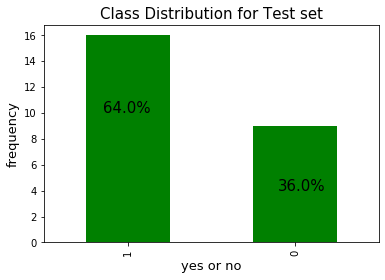

In [122]:
plt.title("Class Distribution for Test set", fontsize=15)
plt.xlabel("yes or no", fontsize=13)
plt.ylabel("frequency", fontsize=13)
zeroes = str(round(y_test.value_counts()[0]/len(y_test),4)*100) + "%"
ones = str(round(y_test.value_counts()[1]/len(y_test),4)*100) + "%"
plt.text(-0.15,10,ones,fontsize=15)
plt.text(0.9,4,zeroes,fontsize=15)
y_test.value_counts().plot.bar(color='green')
plt.show()

 - The above plots show that, although little biased, the distributions are almost in similar ratio in both training and test sets.
 - The above point ensures that whatever model we train over our training set is going to experience almost same level of bias in the test set too.

### Visualising individual performances in both the subjects

In [123]:
import numpy as np

In [124]:
X = np.array(df[["Score 1", "Score 2"]])
y = np.array(df["prediction"])

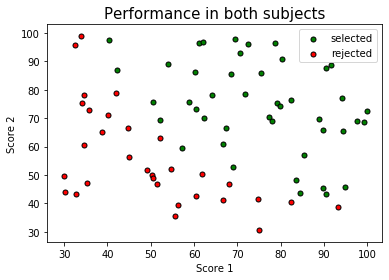

In [125]:
selected = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]
plt.scatter([s[0][0] for s in selected], [s[0][1] for s in selected], s=25, color='green', edgecolor='k', label='selected')
plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s=25, color='red', edgecolor='k', label='rejected')
plt.title("Performance in both subjects", fontsize=15)
plt.xlabel("Score 1")
plt.ylabel("Score 2")
plt.legend()
plt.show()

 - Roughly, it looks like students with good scores in both the subjects were selected. Also, students scoring high marks in subject 1 but low in subject 2 also have high probability of getting selected

## Correlation between variables

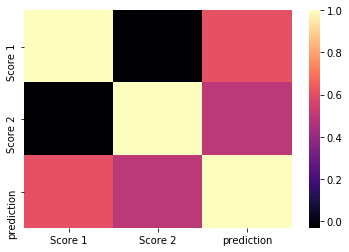

In [126]:
sns.heatmap(df.corr(), cmap='magma')

 - The above table shows that the probability of a student getting selected is more <b>closely related to score 1</b> than score 2.

## Comparing both the scores

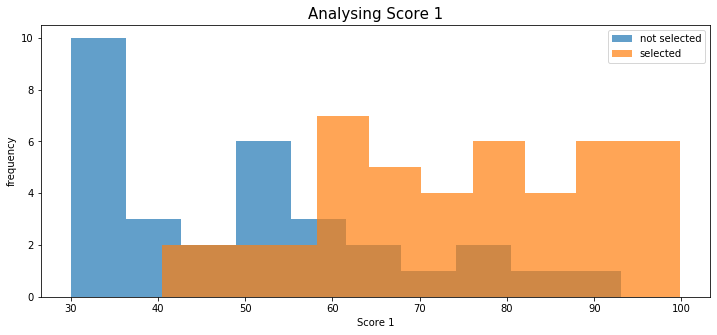

In [127]:
plt.figure(figsize=(12,5))
plt.title("Analysing Score 1", fontsize=15)
plt.hist(df['Score 1'][df['prediction'] == 0], alpha=0.7, label='not selected')
plt.hist(df['Score 1'][df['prediction'] == 1], alpha=0.7, label='selected')
plt.xlabel("Score 1")
plt.ylabel("frequency")
plt.legend()
plt.show()

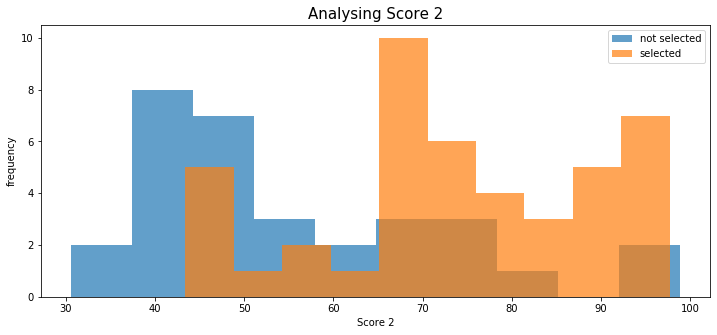

In [128]:
plt.figure(figsize=(12,5))
plt.title("Analysing Score 2", fontsize=15)
plt.hist(df['Score 2'][df['prediction'] == 0], alpha=0.7, label='not selected')
plt.hist(df['Score 2'][df['prediction'] == 1], alpha=0.7, label='selected')
plt.xlabel("Score 2")
plt.ylabel("frequency")
plt.legend()
plt.show()

 - From all the above plots, it seems that scoring 60+ marks in both the subjects can boost the chances of getting selected.

## Scaling the given data

In [129]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Building models and predicting probabilities of getting selected

### Using Logistic regression model

In [130]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)
log_c_preds = log_classifier.predict(X_test)
log_pred_prob = log_classifier.predict_proba(X_test)[:, 1]
print(log_pred_prob)

[0.13348301 0.26168126 0.14938928 0.64331418 0.54392916 0.5850724
 0.12084238 0.86644051 0.55681782 0.50889557 0.97324893 0.98402714
 0.99408483 0.9879694  0.18797847 0.98332373 0.82872171 0.99898667
 0.98671433 0.02649746 0.41786667 0.00243271 0.85913513 0.8801461
 0.08795773]


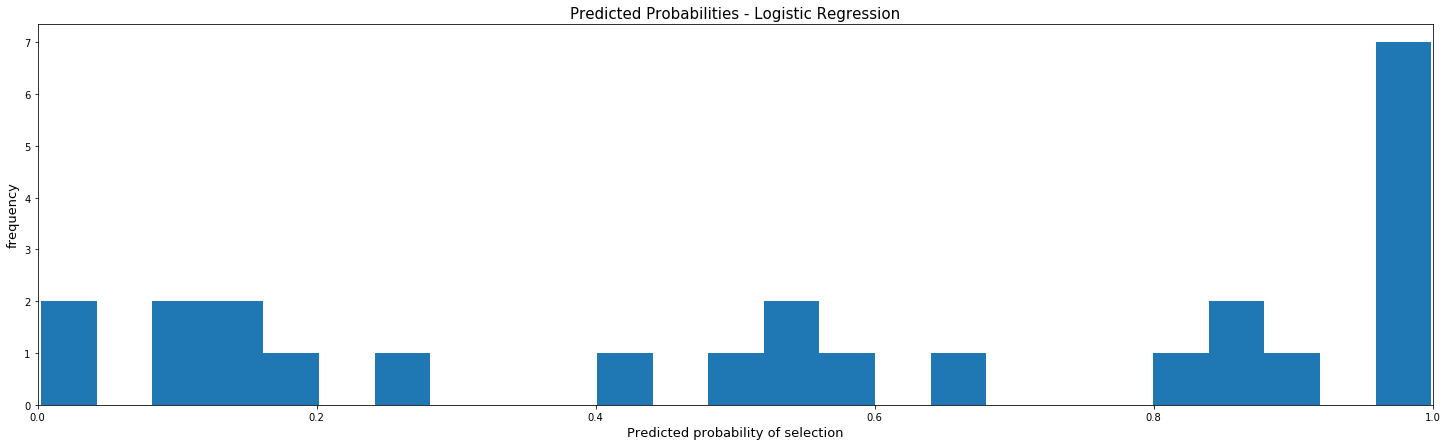

In [131]:
plt.figure(figsize=(25,7))
plt.hist(log_pred_prob, bins=25)
plt.xlim(0,1)
plt.xlabel('Predicted probability of selection', fontsize=13)
plt.ylabel('frequency', fontsize=13)
plt.title('Predicted Probabilities - Logistic Regression', fontsize=15)
plt.show()

### Using SVM model

In [132]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=42, probability=True)
svm_classifier.fit(X_train, y_train)
svm_preds = svm_classifier.predict(X_test)
svm_pred_prob = svm_classifier.predict_proba(X_test)[:, 1]
print(svm_pred_prob)

[0.12974137 0.26532232 0.14564688 0.67018829 0.56546355 0.61255861
 0.11712981 0.88730451 0.57902253 0.52857358 0.98013062 0.98854868
 0.99602177 0.99146514 0.18637695 0.98800387 0.85155989 0.99999887
 0.99059042 0.02356214 0.4317772  0.00182864 0.88129361 0.90014435
 0.08316216]


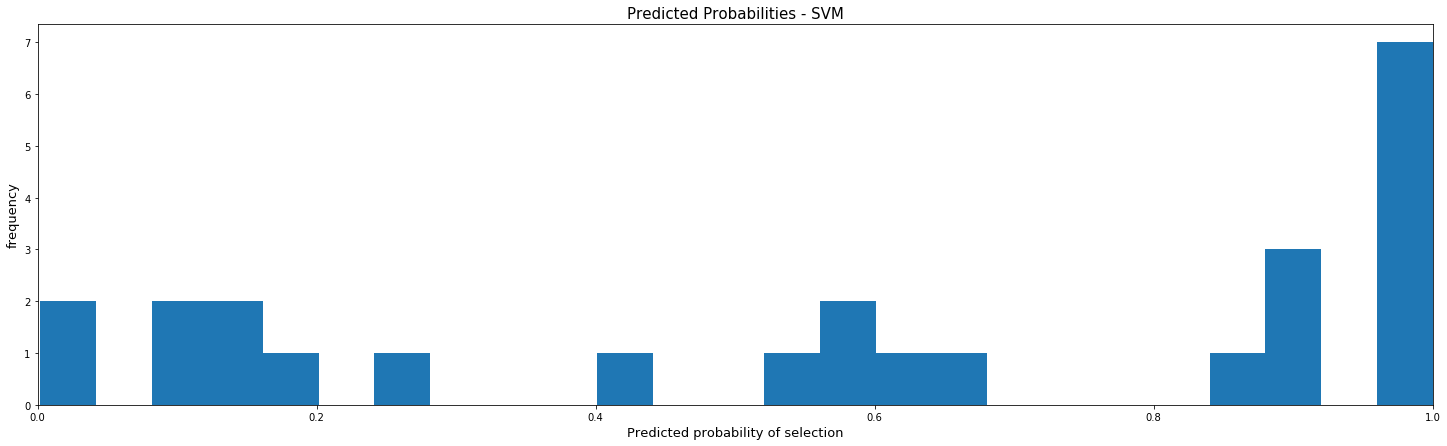

In [133]:
plt.figure(figsize=(25,7))
plt.hist(svm_pred_prob, bins=25)
plt.xlim(0,1)
plt.xlabel('Predicted probability of selection', fontsize=13)
plt.ylabel('frequency', fontsize=13)
plt.title('Predicted Probabilities - SVM', fontsize=15)
plt.show()

### Using Decision Tree model

In [134]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train, y_train)
dt_preds = dt_classifier.predict(X_test)
dt_pred_prob = dt_classifier.predict_proba(X_test)[:, 1]
print(dt_pred_prob)

[0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1.
 0.]


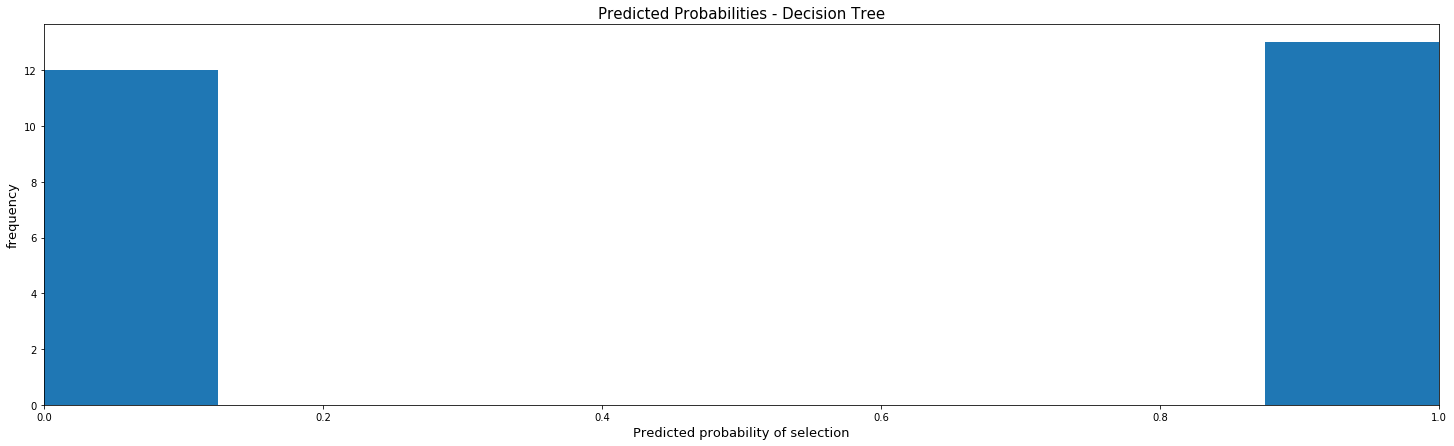

In [135]:
plt.figure(figsize=(25,7))
plt.hist(dt_pred_prob, bins=8)
plt.xlim(0,1)
plt.xlabel('Predicted probability of selection', fontsize=13)
plt.ylabel('frequency', fontsize=13)
plt.title('Predicted Probabilities - Decision Tree', fontsize=15)
plt.show()

### Using Random Forest model

In [136]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=42)
rfc.fit(X_train, y_train)
rfc_preds = rfc.predict(X_test)
rfc_pred_prob = rfc.predict_proba(X_test)[:, 1]
print(rfc_pred_prob)

[0.15 0.3  0.45 0.75 0.8  0.3  0.05 0.95 0.8  0.6  1.   1.   0.9  1.
 0.1  1.   0.15 1.   1.   0.15 0.55 0.05 1.   1.   0.15]


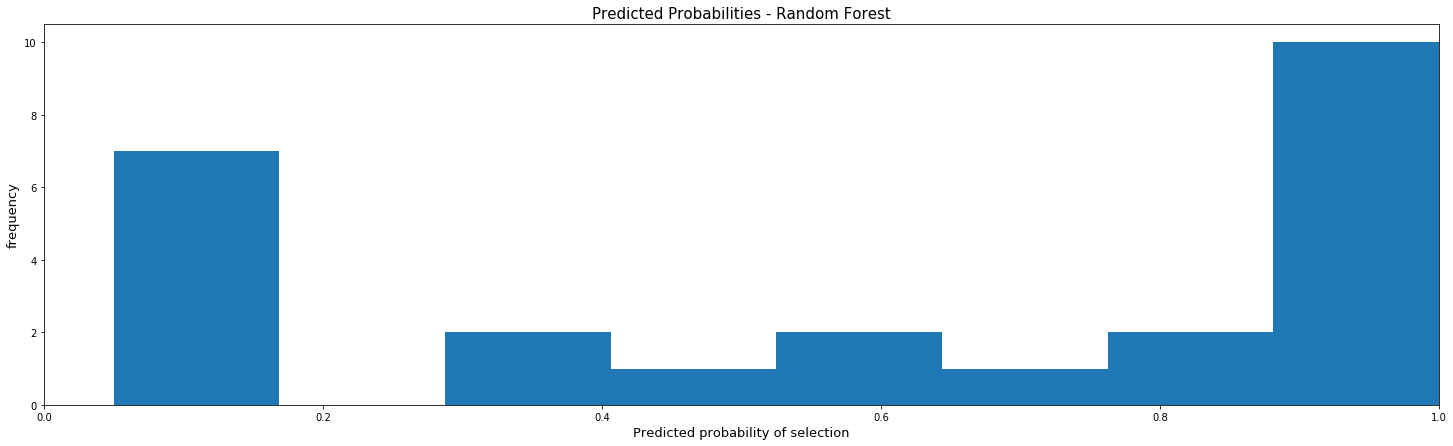

In [137]:
plt.figure(figsize=(25,7))
plt.hist(rfc_pred_prob, bins=8)
plt.xlim(0,1)
plt.xlabel('Predicted probability of selection', fontsize=13)
plt.ylabel('frequency', fontsize=13)
plt.title('Predicted Probabilities - Random Forest', fontsize=15)
plt.show()

### Using KNN model

In [138]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, metric='minkowski')
knn.fit(X_train, y_train)
knn_preds = knn.predict(X_test)
knn_pred_prob = knn.predict_proba(X_test)[:, 1]
print(knn_pred_prob)

[0.2 0.4 0.1 0.7 0.6 0.4 0.1 1.  0.5 0.4 1.  1.  1.  1.  0.1 1.  0.6 1.
 1.  0.  0.4 0.  1.  1.  0.1]


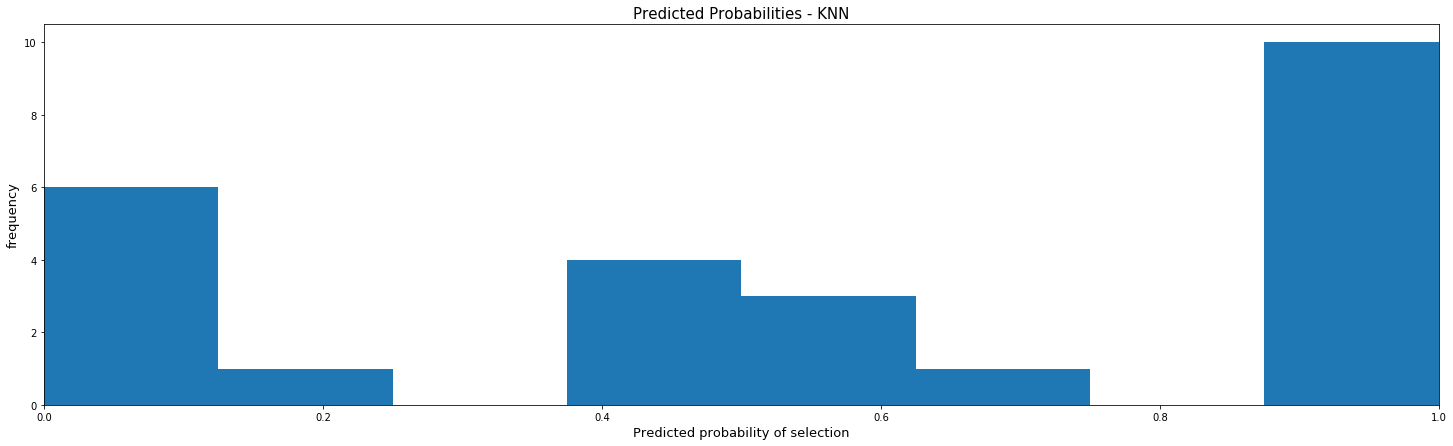

In [139]:
plt.figure(figsize=(25,7))
plt.hist(knn_pred_prob, bins=8)
plt.xlim(0,1)
plt.xlabel('Predicted probability of selection', fontsize=13)
plt.ylabel('frequency', fontsize=13)
plt.title('Predicted Probabilities - KNN', fontsize=15)
plt.show()

### Using Naive Bayes model

In [140]:
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
nb_preds = nb_classifier.predict(X_test)
nb_pred_prob = nb_classifier.predict_proba(X_test)[:, 1]
print(nb_pred_prob)

[0.16823626 0.28563262 0.22495583 0.5922523  0.59187654 0.40306863
 0.10183835 0.84677852 0.60104023 0.56317293 0.93491354 0.95132051
 0.97642826 0.97402573 0.2553301  0.9524371  0.80438562 0.99457082
 0.95697261 0.0492634  0.48790765 0.00490794 0.77490515 0.84012968
 0.1171332 ]


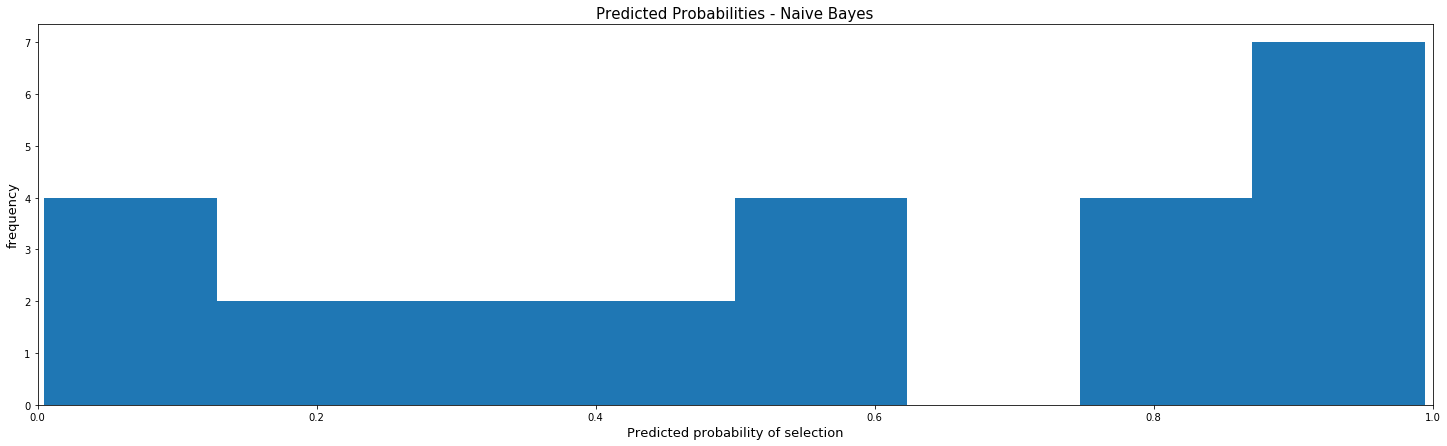

In [141]:
plt.figure(figsize=(25,7))
plt.hist(nb_pred_prob, bins=8)
plt.xlim(0,1)
plt.xlabel('Predicted probability of selection', fontsize=13)
plt.ylabel('frequency', fontsize=13)
plt.title('Predicted Probabilities - Naive Bayes', fontsize=15)
plt.show()

# Evaluation metrics

The following metrics are used for evaluation:

 - F1 score
 - Accuracy Score 
 - Precision 
 - Recall 
 - Confusion Matrix
 - ROC curve
 - AUC

## Confusion Matrix

In [142]:
def show_labels(c):
    plt.text(0.4, 0.5, c[0][1], fontsize=15) ##True negatives
    plt.text(1.4,0.5,c[0][1],fontsize=15) ## False positives
    plt.text(0.4,1.50,c[1][0],fontsize=15) ## False Negatives
    plt.text(1.4,1.50,c[1][1],fontsize=15) ## True Positives

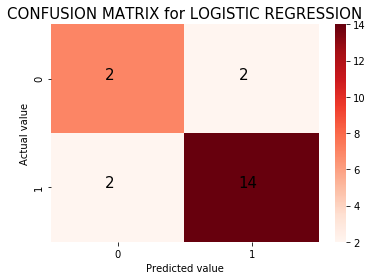

In [143]:
c1 = confusion_matrix(y_test, log_c_preds)
sns.heatmap(c1, cmap='Reds')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('CONFUSION MATRIX for LOGISTIC REGRESSION', fontsize=15)
show_labels(c1)
plt.show()

### Logistic Regression ROC curve

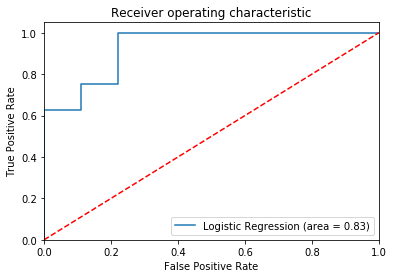

In [144]:
log_roc_auc = roc_auc_score(y_test, log_c_preds)
fpr, tpr, thresholds = roc_curve(y_test, log_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % log_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()
plt.show()

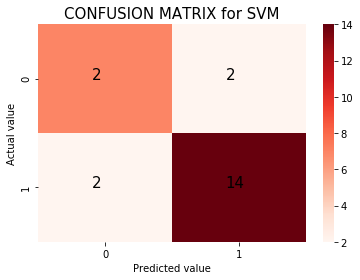

In [145]:
c2 = confusion_matrix(y_test, svm_preds)
sns.heatmap(c2, cmap='Reds')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('CONFUSION MATRIX for SVM', fontsize=15)
show_labels(c2)
plt.show()

### SVM ROC curve

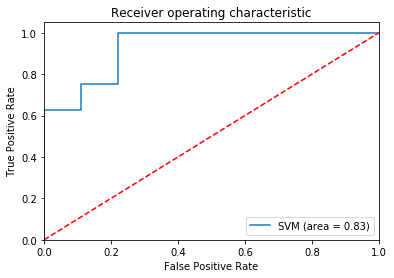

In [146]:
svm_roc_auc = roc_auc_score(y_test, svm_preds)
fpr, tpr, thresholds = roc_curve(y_test, svm_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='SVM (area = %0.2f)' % svm_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()
plt.show()

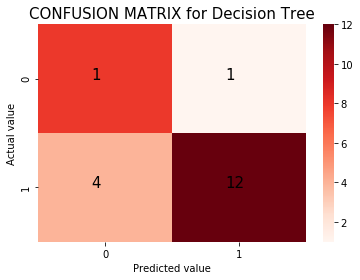

In [147]:
c3 = confusion_matrix(y_test, dt_preds)
sns.heatmap(c3, cmap='Reds')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('CONFUSION MATRIX for Decision Tree', fontsize=15)
show_labels(c3)
plt.show()

### Decision Tree ROC curve

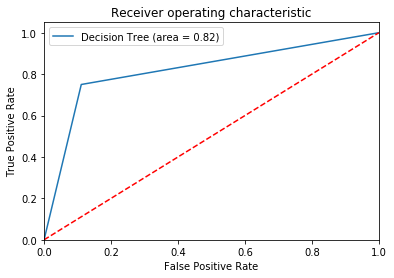

In [148]:
dt_roc_auc = roc_auc_score(y_test, dt_preds)
fpr, tpr, thresholds = roc_curve(y_test, dt_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % dt_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()
plt.show()

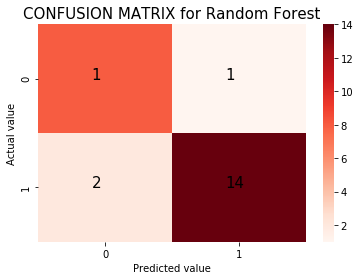

In [149]:
c4 = confusion_matrix(y_test, rfc_preds)
sns.heatmap(c4, cmap='Reds')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('CONFUSION MATRIX for Random Forest', fontsize=15)
show_labels(c4)
plt.show()

### Random Forest ROC curve

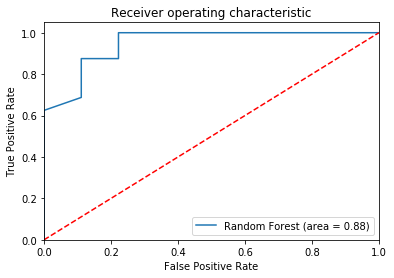

In [150]:
rf_roc_auc = roc_auc_score(y_test, rfc_preds)
fpr, tpr, thresholds = roc_curve(y_test, rfc_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()
plt.show()

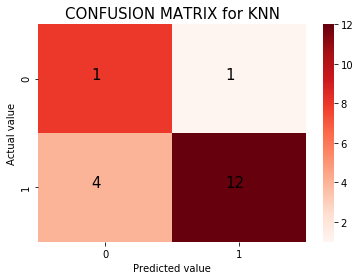

In [151]:
c5 = confusion_matrix(y_test, knn_preds)
sns.heatmap(c5, cmap='Reds')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('CONFUSION MATRIX for KNN', fontsize=15)
show_labels(c5)
plt.show()

### KNN ROC curve

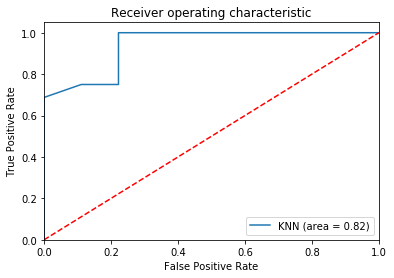

In [152]:
knn_roc_auc = roc_auc_score(y_test, knn_preds)
fpr, tpr, thresholds = roc_curve(y_test, knn_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()
plt.show()

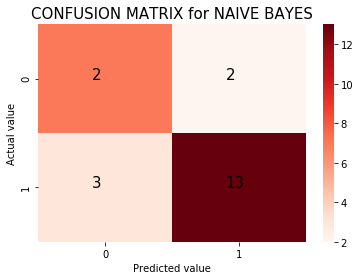

In [153]:
c6 = confusion_matrix(y_test, nb_preds)
sns.heatmap(c6, cmap='Reds')
plt.xlabel('Predicted value')
plt.ylabel('Actual value')
plt.title('CONFUSION MATRIX for NAIVE BAYES', fontsize=15)
show_labels(c6)
plt.show()

### Naive Bayes ROC curve

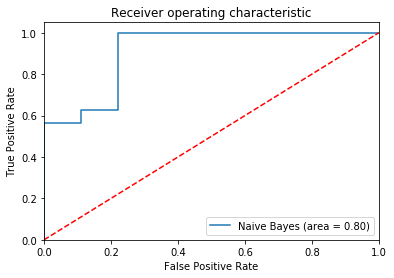

In [154]:
nb_roc_auc = roc_auc_score(y_test, nb_preds)
fpr, tpr, thresholds = roc_curve(y_test, nb_pred_prob)
plt.figure()
plt.plot(fpr, tpr, label='Naive Bayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend()
plt.show()

# Comparing performance of different algorithms

In [155]:
from sklearn.metrics import classification_report
print("\033[1m" + "LOGISTIC REGRESSION: " + "\033[0m" + "\n", classification_report(y_test, log_c_preds))
print("\033[1m" + "SVM: " + "\033[0m" + "\n", classification_report(y_test, svm_preds))
print("\033[1m" + "DECISION TREE: " + "\033[0m" + "\n", classification_report(y_test, dt_preds))
print("\033[1m" + "RANDOM FOREST: " + "\033[0m" + "\n", classification_report(y_test, rfc_preds))
print("\033[1m" + "KNN: " + "\033[0m" + "\n", classification_report(y_test, knn_preds))
print("\033[1m" + "NAIVE BAYES: " + "\033[0m" + "\n", classification_report(y_test, nb_preds))

LOGISTIC REGRESSION: 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.88      0.88      0.88        16

    accuracy                           0.84        25
   macro avg       0.83      0.83      0.83        25
weighted avg       0.84      0.84      0.84        25

SVM: 
               precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.88      0.88      0.88        16

    accuracy                           0.84        25
   macro avg       0.83      0.83      0.83        25
weighted avg       0.84      0.84      0.84        25

DECISION TREE: 
               precision    recall  f1-score   support

           0       0.67      0.89      0.76         9
           1       0.92      0.75      0.83        16

    accuracy                           0.80        25
   macro avg       0.79      0.82      0.79        25
weighted avg       0.83    

 - After all the analysis, the <b>Random Forest Classifier</b> seems to perform the best for the given dataset and achieved highest accuracy and AUC score of <b>0.88</b> and F1 score of <b>0.90</b>